In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [53]:
df.shape

(5000, 14)

In [54]:
df.drop(columns=['ID','ZIP Code'],inplace=True)

In [55]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [56]:
df.shape

(5000, 12)

In [57]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [58]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.shape

(4987, 12)

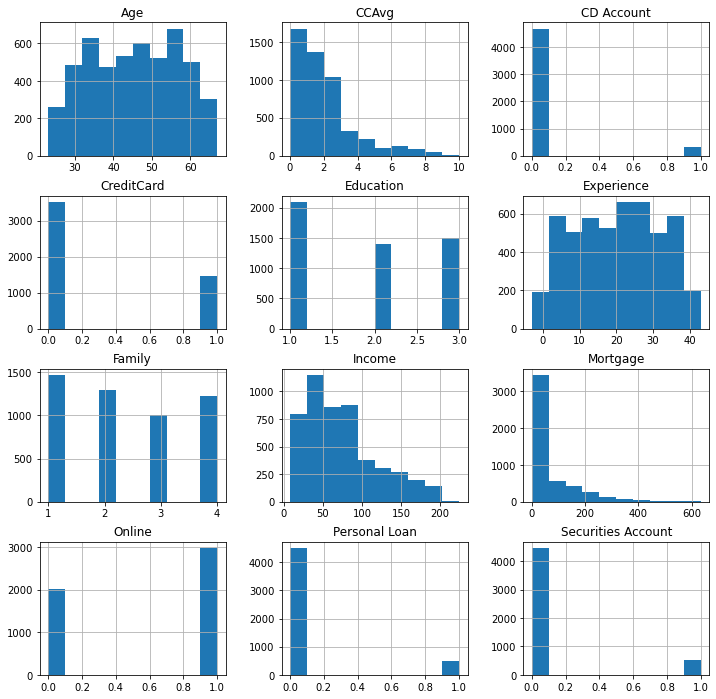

In [61]:
df.hist(figsize=(12,12))
plt.show()

#### Inference from Histogram
    Dependent Variable is Binary Categorical Variable ( 0 or 1 )
    CD Account, Credit Card, Education, Family, Online, Securities Account are Categorical Variables but in Encoded Format.

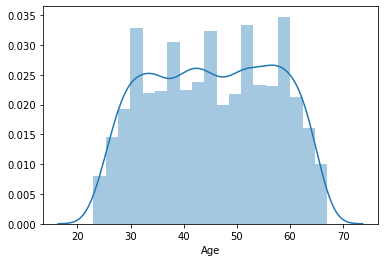

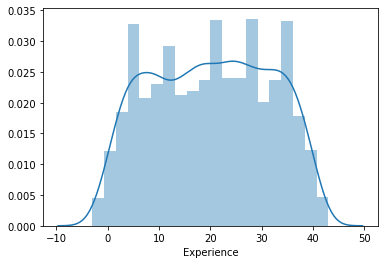

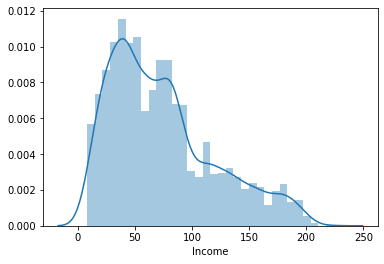

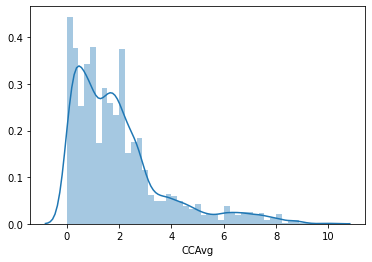

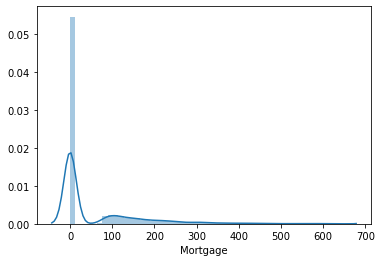

In [62]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in columns:
    sns.distplot(df[col])
    plt.show()

#### Inference from Distplot:
    Age, Experience, Income, CCAvg is Multimodal and has Positive Skewness (Mean > Median)
    Mortgage is Bimodal and has Positive Skewness( Mean > Median)

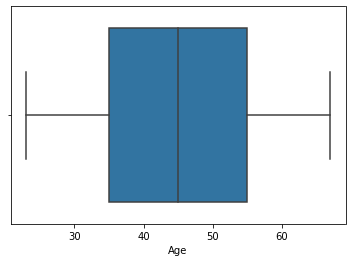

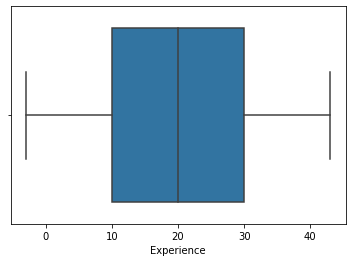

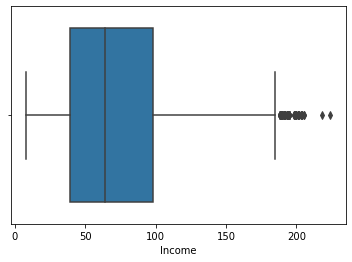

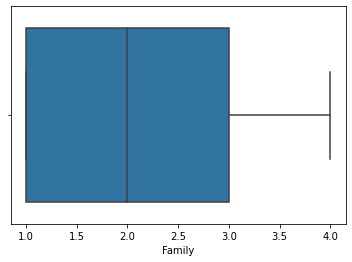

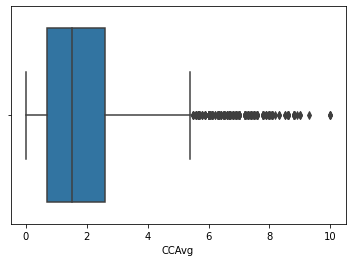

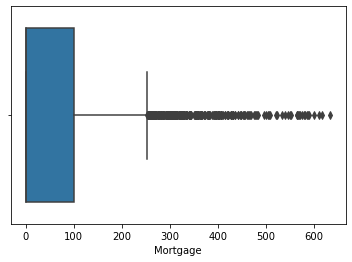

In [63]:
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for col in columns:
    sns.boxplot(df[col])
    plt.show()

#### Inference from Boxplot
    Age, Experience, Family has No Outlier
    Mortgage , CCAvg has Many Outliers
    Income has Moderate Outliers

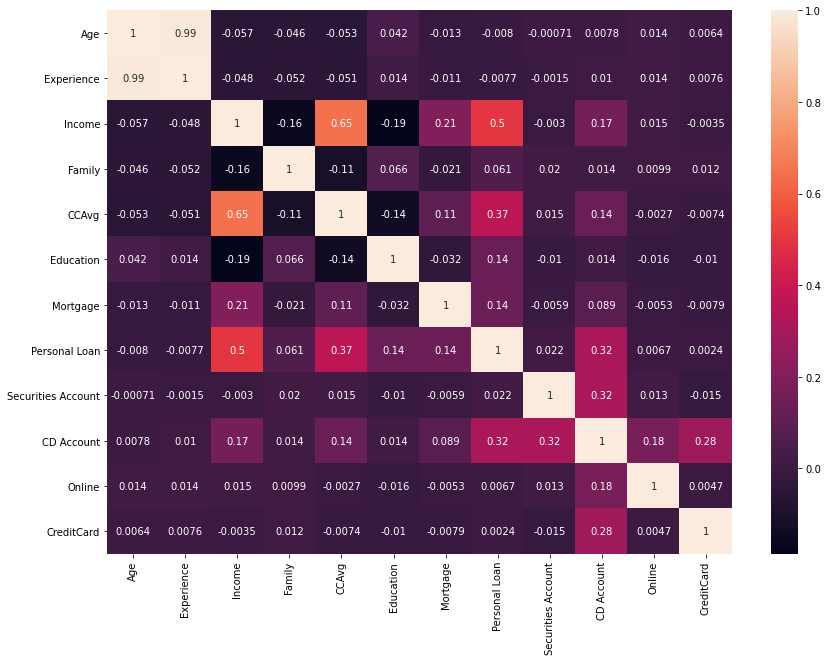

In [64]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot = True)

#### Infernece from Correlation Matrix:
    Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)
    Personal Loan has Almost No Correlation with other Independent Variables.

In [65]:
df.shape

(4987, 12)

In [66]:
y = df['Personal Loan']

In [67]:
y.shape

(4987,)

In [69]:
x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

In [70]:
x.shape

(4987, 11)

In [72]:
import statsmodels.api as sm

In [73]:
x1 = sm.add_constant(x)
Logistic = sm.Logit(y,x1)

In [74]:
logreg = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


logreg.summary()

#### Inference According to The Model
The most important features that Decide if one gets a loan from a bank or not are

1.Income of the Person.

2.Size of the Family .

3.Education of a person .

4.Weather the Person has a CD Account or not .

5.Weather a person use online banking or not.

6.Weather the Person is Owner of a Credit Card or not.

#### The Features that has a moderate effect on the One Getting a loan or not
1.Weather the person has a Securites Account or not.

2.The average spending of an individual on The credit Card

## OR

#### Inference from Logistic Regression
Age, Experience, Mortgage has p value more than 0.05 ie, these are Not Significantly Important
All Other Attributes has p value less than 0.05 ie, they are Significantly Important .
Out of all these variables,Income, Family, Education, CD Account, Online and Credit Card are Most Significant
#### The regression equation is -
Personal Loan = -12.19 - 0.054(Age) + 0.064(Experience) + 0.0548(Income) + 0.69(Family) + 0.12(CCAvg) + 1.73(Education) + 0.0005(Mortgage) - 0.94(Securities Account) + 3.82(CD Account) - 0.67(Online) - 1.12(CreditCard)